# Predicting World Series Winner using Machine Learning

This notebook will attempt at predicting the World Series Winner using various Python-based machine learning and data science libraries. The end result will be a deployable machine learning model capable of predicting which team in Baseball will win the World Series based on their team statistics.

Methodology for this project:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
7. Deployment
8. A/B Testing
9. Results Analysis
10. Retraining

## 1. Problem Statement

> Can we predict the World Series Champion for each year?

## 2. Data

The original data came from the Lahman's Baseball Database: http://www.seanlahman.com/baseball-archive/statistics/

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a team will win the World Series during the initial proof of concept stage, then we will continue into implementation.

## 4. Features

`Teams.csv` contains all the teams yearly stats and standings from 1871 to 2019. 

**Data Dictionary** 

1. yearID - Year
2. lgID - League
3. teamID - Team
4. franchID - Franchise (links to TeamsFranchise table)
5. divID - Team's division
6. Rank - Position in final standings
7. G - Games played
8. GHome - Games played at home
9. W - Wins
10. L - Losses
11. DivWin - Division Winner (Y or N)
12. WCWin - Wild Card Winner (Y or N)
13. LgWin - League Champion(Y or N)
14. WSWin - World Series Winner (Y or N)
15. R - Runs scored
16. AB - At bats
17. H - Hits by batters
18. 2B - Doubles
19. 3B - Triples
20. HR - Homeruns by batters
21. BB - Walks by batters
22. SO - Strikeouts by batters
23. SB - Stolen bases
24. CS - Caught stealing
25. HBP - Batters hit by pitch
26. SF - Sacrifice flies
27. RA - Opponents runs scored
28. ER - Earned runs allowed
29. ERA - Earned run average
30. CG - Complete games
31. SHO - Shutouts
32. SV - Saves
33. IPOuts - Outs Pitched (innings pitched x 3)
34. HA - Hits allowed
35. HRA - Homeruns allowed
36. BBA - Walks allowed
37. SOA - Strikeouts by pitchers
38. E - Errors
39. DP - Double Plays
40. FP - Fielding  percentage
41. name - Team's full name
42. park - Name of team's home ballpark
43. attendance - Home attendance total
44. BPF - Three-year park factor for batters
45. PPF - Three-year park factor for pitchers
46. teamIDBR - Team ID used by Baseball Reference website
47. teamIDlahman45 - Team ID used in Lahman database version 4.5
48. teamIDretro - Team ID used by Retrosheet

## Python Libraries Setup

Import Pandas, Matplotlib, Numpy, and Seaborn.

In [176]:
# Import tools needed

# Exploratory Data Analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [177]:
df = pd.read_csv("Teams.csv")
df.shape #(rows, columns)

(2925, 48)

## Exploratory Data Analysis

In [178]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [179]:
df.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2920,2019,NL,SLN,STL,C,1,162,81.0,91,71,Y,N,N,N,764,5449,1336,246,24,210,561.0,1420.0,116.0,29.0,76.0,39.0,662,609,3.80,1,14,52,4332,1284,191,545,1399,66,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN
2921,2019,AL,TBA,TBD,E,2,162,81.0,96,66,N,Y,N,N,769,5628,1427,291,29,217,542.0,1493.0,94.0,37.0,73.0,34.0,656,598,3.65,0,12,46,4423,1274,181,453,1621,87,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA
2922,2019,AL,TEX,TEX,W,3,162,81.0,78,84,N,N,N,N,810,5540,1374,296,24,223,534.0,1578.0,131.0,38.0,67.0,44.0,878,808,5.06,4,9,33,4314,1515,241,583,1379,105,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX
2923,2019,AL,TOR,TOR,E,4,162,81.0,67,95,N,N,N,N,726,5493,1299,270,21,247,509.0,1514.0,51.0,20.0,45.0,28.0,828,767,4.79,1,7,33,4321,1450,228,604,1332,96,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR
2924,2019,NL,WAS,WSN,E,2,162,81.0,93,69,N,Y,Y,Y,873,5512,1460,298,27,231,584.0,1308.0,116.0,29.0,81.0,42.0,724,683,4.27,1,13,40,4318,1340,202,517,1511,87,111,0.985,Washington Nationals,Nationals Park,2259781.0,106,104,WSN,MON,WAS


In [180]:
df["WSWin"].value_counts()

N    2448
Y     120
Name: WSWin, dtype: int64

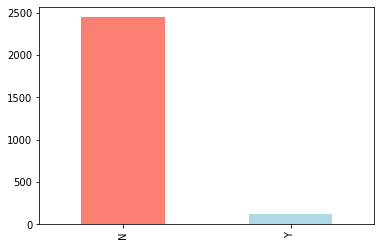

In [181]:
df["WSWin"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2925 non-null   int64  
 1   lgID            2875 non-null   object 
 2   teamID          2925 non-null   object 
 3   franchID        2925 non-null   object 
 4   divID           1408 non-null   object 
 5   Rank            2925 non-null   int64  
 6   G               2925 non-null   int64  
 7   Ghome           2526 non-null   float64
 8   W               2925 non-null   int64  
 9   L               2925 non-null   int64  
 10  DivWin          1380 non-null   object 
 11  WCWin           744 non-null    object 
 12  LgWin           2897 non-null   object 
 13  WSWin           2568 non-null   object 
 14  R               2925 non-null   int64  
 15  AB              2925 non-null   int64  
 16  H               2925 non-null   int64  
 17  2B              2925 non-null   i

In [183]:
df.isna().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   1
SO                  16
SB                 126
CS                 832
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

In [184]:
df.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2925.000000,2925.000000,2925.000000,2526.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2909.000000,2799.000000,2093.000000,1767.000000,1384.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2.646000e+03,2925.000000,2925.000000
mean,1957.599316,4.061538,150.808205,78.585511,75.004103,75.004103,684.623248,5158.655385,1348.460513,229.707009,46.298120,105.217778,475.789672,758.007563,110.647017,47.405160,45.717035,44.901734,684.622222,575.663248,3.830082,48.493675,9.677949,24.371282,4035.986325,1348.235556,105.217778,475.982906,757.465641,183.241026,133.540513,0.965985,1.390692e+06,100.193162,100.214701
std,42.505220,2.303934,22.878728,4.617874,17.522547,17.267846,134.547497,738.885194,216.074082,58.699191,22.252469,63.790119,130.553444,314.800770,69.822488,21.570579,17.835039,9.226508,134.054573,147.250767,0.764053,39.149373,5.021453,16.356251,620.821511,216.128882,60.644155,129.963105,315.919210,108.024341,35.169866,0.029253,9.604662e+05,4.924598,4.851388
min,1871.000000,1.000000,6.000000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,3.000000,7.000000,18.000000,34.000000,23.000000,1.220000,0.000000,0.000000,0.000000,162.000000,49.000000,0.000000,1.000000,0.000000,47.000000,0.000000,0.761000,6.088000e+03,60.000000,60.000000
25%,1921.000000,2.000000,154.000000,77.000000,66.000000,66.000000,615.000000,5146.000000,1303.000000,195.000000,30.000000,44.000000,428.000000,515.000000,63.000000,34.000000,32.000000,38.000000,612.000000,505.000000,3.360000,11.000000,6.000000,9.000000,4083.000000,1291.000000,49.000000,431.000000,510.000000,114.000000,117.000000,0.966000,5.538080e+05,97.000000,97.000000
50%,1966.000000,4.000000,159.000000,81.000000,77.000000,76.000000,692.000000,5408.000000,1393.000000,234.000000,40.000000,110.000000,494.500000,761.000000,94.000000,44.000000,43.000000,45.000000,690.000000,595.000000,3.830000,43.000000,9.000000,25.000000,4260.000000,1392.000000,113.000000,496.000000,762.000000,143.000000,141.000000,0.977000,1.200656e+06,100.000000,100.000000
75%,1995.000000,6.000000,162.000000,81.000000,87.000000,87.000000,765.000000,5522.000000,1466.000000,272.000000,59.000000,154.000000,555.000000,987.000000,138.000000,57.000000,57.000000,51.000000,766.000000,671.000000,4.320000,76.000000,13.000000,39.000000,4342.000000,1470.000000,153.000000,554.000000,992.000000,210.000000,157.000000,0.981000,2.081326e+06,103.000000,103.000000
max,2019.000000,13.000000,165.000000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,150.000000,307.000000,835.000000,1595.000000,581.000000,191.000000,160.000000,77.000000,1252.000000,1023.000000,8.000000,148.000000,32.000000,68.000000,4518.000000,1993.000000,305.000000,827.000000,1687.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


### World Series Winner based on Number of Wins

In [185]:
df.W.value_counts()

75     86
86     85
83     83
76     80
79     76
       ..
114     1
18      1
3       1
1       1
111     1
Name: W, Length: 112, dtype: int64

In [186]:
pd.crosstab(df.WSWin, df.W)

W,12,15,23,26,27,28,29,30,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,114,116
WSWin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,2,1,1,1,1,2,1,2,1,3,2,3,2,2,6,3,10,5,4,7,6,5,8,12,15,14,20,18,20,18,21,16,29,25,28,34,36,48,40,45,58,55,54,53,66,51,51,65,79,76,65,65,72,64,68,55,75,64,65,80,64,69,64,60,51,52,44,33,43,34,34,26,9,12,14,10,12,8,3,2,2,0,1,0,1,0,2
Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,2,1,0,1,3,1,3,7,8,7,5,8,5,9,11,7,5,7,5,3,2,3,2,2,4,1,2,0,1,0


In [187]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


## Data Preproccessing

Data will only include seasons from 1995 and onwards. Season of 1995 marks the introduction of Wild Cards. This feature will be included and requires appropriate representation during this study.

In [188]:
# Make a copy of original Dataframe to perform edits on
df_tmp = df.copy()

In [189]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [190]:
getIndexes(df_tmp, 1995)

[(2181, 'yearID'),
 (2182, 'yearID'),
 (2183, 'yearID'),
 (2184, 'yearID'),
 (2185, 'yearID'),
 (2186, 'yearID'),
 (2187, 'yearID'),
 (2188, 'yearID'),
 (2189, 'yearID'),
 (2190, 'yearID'),
 (2191, 'yearID'),
 (2192, 'yearID'),
 (2193, 'yearID'),
 (2194, 'yearID'),
 (2195, 'yearID'),
 (2196, 'yearID'),
 (2197, 'yearID'),
 (2198, 'yearID'),
 (2199, 'yearID'),
 (2200, 'yearID'),
 (2201, 'yearID'),
 (2202, 'yearID'),
 (2203, 'yearID'),
 (2204, 'yearID'),
 (2205, 'yearID'),
 (2206, 'yearID'),
 (2207, 'yearID'),
 (2208, 'yearID')]

In [191]:
print(df_tmp.loc[[2181]])

      yearID lgID teamID franchID divID  Rank    G  Ghome   W   L DivWin  \
2181    1995   NL    ATL      ATL     E     1  144   72.0  90  54      Y   

     WCWin LgWin WSWin    R    AB     H   2B  3B   HR     BB     SO    SB  \
2181     N     Y     Y  645  4814  1202  210  27  168  520.0  933.0  73.0   

        CS   HBP    SF   RA   ER   ERA  CG  SHO  SV  IPouts    HA  HRA  BBA  \
2181  43.0  40.0  34.0  540  494  3.44  18   11  34    3875  1184  107  436   

       SOA    E   DP     FP            name                           park  \
2181  1087  100  113  0.982  Atlanta Braves  Atlanta-Fulton County Stadium   

      attendance  BPF  PPF teamIDBR teamIDlahman45 teamIDretro  
2181   2561831.0  103  102      ATL            ATL         ATL  


In [192]:
df_tmp = df_tmp.drop(df_tmp.index[:2181])

In [193]:
df_tmp.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72.0,90,54,Y,N,Y,Y,645,4814,1202,210,27,168,520.0,933.0,73.0,43.0,40.0,34.0,540,494,3.44,18,11,34,3875,1184,107,436,1087,100,113,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72.0,71,73,N,N,N,N,704,4837,1267,229,27,173,574.0,803.0,92.0,45.0,39.0,41.0,640,607,4.31,19,10,29,3801,1165,149,523,930,72,141,0.986,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL
2183,1995,AL,BOS,BOS,E,1,144,72.0,86,58,Y,N,N,N,791,4997,1399,286,31,175,560.0,923.0,99.0,44.0,65.0,49.0,698,631,4.39,7,9,39,3878,1338,127,476,888,120,151,0.978,Boston Red Sox,Fenway Park II,2164410.0,103,103,BOS,BOS,BOS
2184,1995,AL,CAL,ANA,W,2,145,72.0,78,67,N,N,N,N,801,5019,1390,252,25,186,564.0,889.0,58.0,39.0,36.0,38.0,697,645,4.52,8,9,42,3853,1310,163,486,901,95,120,0.982,California Angels,Anaheim Stadium,1748680.0,99,99,CAL,CAL,CAL
2185,1995,AL,CHA,CHW,C,3,145,72.0,68,76,N,N,N,N,755,5060,1417,252,37,146,576.0,767.0,110.0,39.0,32.0,56.0,758,693,4.85,12,4,36,3854,1374,164,617,892,108,131,0.980,Chicago White Sox,Comiskey Park II,1609773.0,96,95,CHW,CHA,CHA


In [194]:
len(df_tmp)

744

In [195]:
len(df)

2925

In [196]:
df_tmp.isna().sum()

yearID            0
lgID              0
teamID            0
franchID          0
divID             0
Rank              0
G                 0
Ghome             0
W                 0
L                 0
DivWin            0
WCWin             0
LgWin             0
WSWin             0
R                 0
AB                0
H                 0
2B                0
3B                0
HR                0
BB                0
SO                0
SB                0
CS                0
HBP               0
SF                0
RA                0
ER                0
ERA               0
CG                0
SHO               0
SV                0
IPouts            0
HA                0
HRA               0
BBA               0
SOA               0
E                 0
DP                0
FP                0
name              0
park              0
attendance        0
BPF               0
PPF               0
teamIDBR          0
teamIDlahman45    0
teamIDretro       0
dtype: int64

In [197]:
df_tmp["WSWin"] = df_tmp["WSWin"].map(lambda x: 1 if x == 'Y' else 0)
df_tmp["WSWin"] = df_tmp["WSWin"].astype(int)
pd.set_option('display.max_columns', None)
df_tmp

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72.0,90,54,Y,N,Y,1,645,4814,1202,210,27,168,520.0,933.0,73.0,43.0,40.0,34.0,540,494,3.44,18,11,34,3875,1184,107,436,1087,100,113,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72.0,71,73,N,N,N,0,704,4837,1267,229,27,173,574.0,803.0,92.0,45.0,39.0,41.0,640,607,4.31,19,10,29,3801,1165,149,523,930,72,141,0.986,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL
2183,1995,AL,BOS,BOS,E,1,144,72.0,86,58,Y,N,N,0,791,4997,1399,286,31,175,560.0,923.0,99.0,44.0,65.0,49.0,698,631,4.39,7,9,39,3878,1338,127,476,888,120,151,0.978,Boston Red Sox,Fenway Park II,2164410.0,103,103,BOS,BOS,BOS
2184,1995,AL,CAL,ANA,W,2,145,72.0,78,67,N,N,N,0,801,5019,1390,252,25,186,564.0,889.0,58.0,39.0,36.0,38.0,697,645,4.52,8,9,42,3853,1310,163,486,901,95,120,0.982,California Angels,Anaheim Stadium,1748680.0,99,99,CAL,CAL,CAL
2185,1995,AL,CHA,CHW,C,3,145,72.0,68,76,N,N,N,0,755,5060,1417,252,37,146,576.0,767.0,110.0,39.0,32.0,56.0,758,693,4.85,12,4,36,3854,1374,164,617,892,108,131,0.980,Chicago White Sox,Comiskey Park II,1609773.0,96,95,CHW,CHA,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,NL,SLN,STL,C,1,162,81.0,91,71,Y,N,N,0,764,5449,1336,246,24,210,561.0,1420.0,116.0,29.0,76.0,39.0,662,609,3.80,1,14,52,4332,1284,191,545,1399,66,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN
2921,2019,AL,TBA,TBD,E,2,162,81.0,96,66,N,Y,N,0,769,5628,1427,291,29,217,542.0,1493.0,94.0,37.0,73.0,34.0,656,598,3.65,0,12,46,4423,1274,181,453,1621,87,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA
2922,2019,AL,TEX,TEX,W,3,162,81.0,78,84,N,N,N,0,810,5540,1374,296,24,223,534.0,1578.0,131.0,38.0,67.0,44.0,878,808,5.06,4,9,33,4314,1515,241,583,1379,105,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX
2923,2019,AL,TOR,TOR,E,4,162,81.0,67,95,N,N,N,0,726,5493,1299,270,21,247,509.0,1514.0,51.0,20.0,45.0,28.0,828,767,4.79,1,7,33,4321,1450,228,604,1332,96,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR


In [202]:
df_tmp["WSWin"].value_counts()

0    719
1     25
Name: WSWin, dtype: int64

In [199]:
# Convert N/Y columns to integer values
df_tmp["DivWin"] = df_tmp["DivWin"].map(lambda x: 1 if x == 'Y' else 0)
df_tmp["DivWin"] = df_tmp["DivWin"].astype(int)
df_tmp["WCWin"] = df_tmp["WCWin"].map(lambda x: 1 if x == 'Y' else 0)
df_tmp["WCWin"] = df_tmp["WCWin"].astype(int)
df_tmp["LgWin"] = df_tmp["LgWin"].map(lambda x: 1 if x == 'Y' else 0)
df_tmp["LgWin"] = df_tmp["LgWin"].astype(int)
df_tmp.head(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72.0,90,54,1,0,1,1,645,4814,1202,210,27,168,520.0,933.0,73.0,43.0,40.0,34.0,540,494,3.44,18,11,34,3875,1184,107,436,1087,100,113,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72.0,71,73,0,0,0,0,704,4837,1267,229,27,173,574.0,803.0,92.0,45.0,39.0,41.0,640,607,4.31,19,10,29,3801,1165,149,523,930,72,141,0.986,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL
2183,1995,AL,BOS,BOS,E,1,144,72.0,86,58,1,0,0,0,791,4997,1399,286,31,175,560.0,923.0,99.0,44.0,65.0,49.0,698,631,4.39,7,9,39,3878,1338,127,476,888,120,151,0.978,Boston Red Sox,Fenway Park II,2164410.0,103,103,BOS,BOS,BOS
2184,1995,AL,CAL,ANA,W,2,145,72.0,78,67,0,0,0,0,801,5019,1390,252,25,186,564.0,889.0,58.0,39.0,36.0,38.0,697,645,4.52,8,9,42,3853,1310,163,486,901,95,120,0.982,California Angels,Anaheim Stadium,1748680.0,99,99,CAL,CAL,CAL
2185,1995,AL,CHA,CHW,C,3,145,72.0,68,76,0,0,0,0,755,5060,1417,252,37,146,576.0,767.0,110.0,39.0,32.0,56.0,758,693,4.85,12,4,36,3854,1374,164,617,892,108,131,0.980,Chicago White Sox,Comiskey Park II,1609773.0,96,95,CHW,CHA,CHA
2186,1995,NL,CHN,CHC,C,3,144,72.0,73,71,0,0,0,0,693,4963,1315,267,39,158,440.0,953.0,105.0,37.0,34.0,35.0,671,597,4.13,6,12,45,3903,1313,162,518,926,115,115,0.979,Chicago Cubs,Wrigley Field,1918265.0,98,98,CHC,CHN,CHN
2187,1995,NL,CIN,CIN,C,1,144,72.0,85,59,1,0,0,0,747,4903,1326,277,35,161,519.0,946.0,190.0,68.0,40.0,50.0,623,578,4.03,8,10,38,3868,1270,131,424,903,79,140,0.986,Cincinnati Reds,Riverfront Stadium,1837649.0,100,99,CIN,CIN,CIN
2188,1995,AL,CLE,CLE,C,1,144,72.0,100,44,1,0,1,0,840,5028,1461,279,23,207,542.0,766.0,132.0,53.0,35.0,48.0,607,554,3.83,10,10,50,3903,1261,135,445,926,101,142,0.982,Cleveland Indians,Jacobs Field,2842745.0,101,99,CLE,CLE,CLE
2189,1995,NL,COL,COL,W,2,144,72.0,77,67,0,1,0,0,785,4994,1406,259,43,200,484.0,943.0,125.0,59.0,56.0,31.0,783,711,4.97,1,1,43,3865,1443,160,512,891,107,146,0.981,Colorado Rockies,Coors Field,3390037.0,129,129,COL,COL,COL
2190,1995,AL,DET,DET,E,4,144,72.0,60,84,0,0,0,0,654,4865,1204,228,29,159,551.0,987.0,73.0,36.0,41.0,43.0,844,778,5.49,5,3,38,3825,1509,170,536,729,106,143,0.981,Detroit Tigers,Tiger Stadium,1180979.0,100,101,DET,DET,DET


In [200]:
# Find the correleation between independent variables
corr_matrix = df_tmp.corr()
corr_matrix

,yearID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
yearID,1.000000,0.014569,0.336911,0.335135,0.049962,0.050130,-0.006216,0.085789,-0.003320,-0.002307,-0.280615,0.157005,-0.307439,-0.104239,-0.115050,0.106111,-0.274535,0.698184,-0.240406,-0.476037,0.125980,-0.311892,-0.263002,-0.225488,-0.280564,-0.580065,0.276461,0.078040,0.341855,-0.278879,0.134657,-0.296963,0.699912,-0.412591,-0.205125,0.408740,0.103221,-0.011498,-0.016389
Rank,0.014569,1.000000,0.012336,-0.007571,-0.866075,0.873210,-0.696517,-0.206245,-0.323639,-0.222247,-0.471508,-0.063795,-0.292033,-0.192652,0.087742,-0.338764,-0.392789,0.130154,-0.058709,0.076728,-0.086333,-0.260966,0.547284,0.536683,0.546943,-0.128670,-0.376740,-0.564887,-0.146118,0.438433,0.330650,0.364371,-0.250013,0.268726,0.178315,-0.275571,-0.422149,-0.060283,0.065413
G,0.336911,0.012336,1.000000,0.964902,0.158602,0.132606,-0.005622,0.027897,-0.001957,-0.004629,0.125011,0.829094,0.279177,0.262610,0.007716,0.154408,0.064266,0.281682,-0.052319,-0.097437,0.167121,0.060302,0.098940,0.112906,-0.061005,-0.203326,0.090458,0.136862,0.923082,0.244889,0.180058,0.055024,0.288316,-0.019228,0.114260,0.148832,0.173031,-0.003174,-0.005343
Ghome,0.335135,-0.007571,0.964902,1.000000,0.168613,0.112457,0.004640,0.028950,-0.003588,-0.010921,0.126229,0.804985,0.277295,0.261157,0.004216,0.152945,0.068726,0.282753,-0.045679,-0.100509,0.158270,0.052941,0.086582,0.101102,-0.066971,-0.197450,0.095729,0.148637,0.893840,0.231131,0.178378,0.038868,0.285751,-0.025100,0.101069,0.148403,0.192745,-0.006561,-0.010045
W,0.049962,-0.866075,0.158602,0.168613,1.000000,-0.957488,0.607362,0.295560,0.337022,0.235080,0.548048,0.214779,0.368700,0.290340,-0.106713,0.412728,0.444253,-0.080734,0.046715,-0.100597,0.157034,0.301276,-0.606935,-0.591653,-0.633232,0.109119,0.484757,0.658658,0.327165,-0.467164,-0.335516,-0.405069,0.352023,-0.309496,-0.187556,0.339687,0.500461,0.078292,-0.058484
L,0.050130,0.873210,0.132606,0.112457,-0.957488,1.000000,-0.611201,-0.289247,-0.340334,-0.237384,-0.514448,0.026233,-0.289157,-0.215239,0.109621,-0.369616,-0.428373,0.164628,-0.062856,0.071924,-0.109795,-0.286140,0.637469,0.626313,0.617295,-0.170515,-0.459102,-0.621380,-0.058930,0.539533,0.389055,0.421869,-0.267742,0.303844,0.221271,-0.296319,-0.451873,-0.079188,0.057546
DivWin,-0.006216,-0.696517,-0.005622,0.004640,0.607362,-0.611201,1.000000,-0.156787,0.360192,0.240932,0.329214,0.046718,0.219492,0.131019,-0.060560,0.228669,0.252325,-0.091047,0.067303,-0.048974,0.046626,0.189540,-0.370195,-0.362698,-0.369604,0.131126,0.282152,0.379594,0.099806,-0.276232,-0.215181,-0.282956,0.180350,-0.164707,-0.134332,0.161919,0.360497,0.044353,-0.045991
WCWin,0.085789,-0.206245,0.027897,0.028950,0.295560,-0.289247,-0.156787,1.000000,0.161705,0.125454,0.153892,0.030793,0.050954,0.078070,0.017039,0.135902,0.191002,0.073164,-0.062781,-0.061766,0.073281,0.085051,-0.203966,-0.197224,-0.204297,-0.042346,0.137671,0.169763,0.081717,-0.188867,-0.121116,-0.124903,0.149334,-0.127636,-0.061233,0.145400,0.120633,0.086387,0.048006
LgWin,-0.003320,-0.323639,-0.001957,-0.003588,0.337022,-0.340334,0.360192,0.161705,1.000000,0.694705,0.178630,0.028929,0.140916,0.126465,-0.010523,0.112869,0.129207,-0.094930,0.040163,0.005179,0.040526,0.091416,-0.224956,-0.220251,-0.222193,0.071334,0.159869,0.193618,0.045741,-0.208936,-0.130275,-0.150098,0.116681,-0.103681,-0.108618,0.102401,0.179109,0.028696,-0.021537
WSWin,-0.002307,-0.222247,-0.004629,-0.010921,0.235080,-0.237384,0.240932,0.125454,0.694705,1.000000,0.142064,0.024131,0.120640,0.104336,0.031799,0.052006,0.098953,-0.078516,0.024389,0.018929,0.060449,0.078551,-0.142724,-0.132966,-0.133394,0.058549,0.110107,0.106201,0.020897,-0.155676,-0.089604,-0.050390,0.078429,-0.086024,-0.076262,0.083079,0.115326,-0.003013,-0.032495


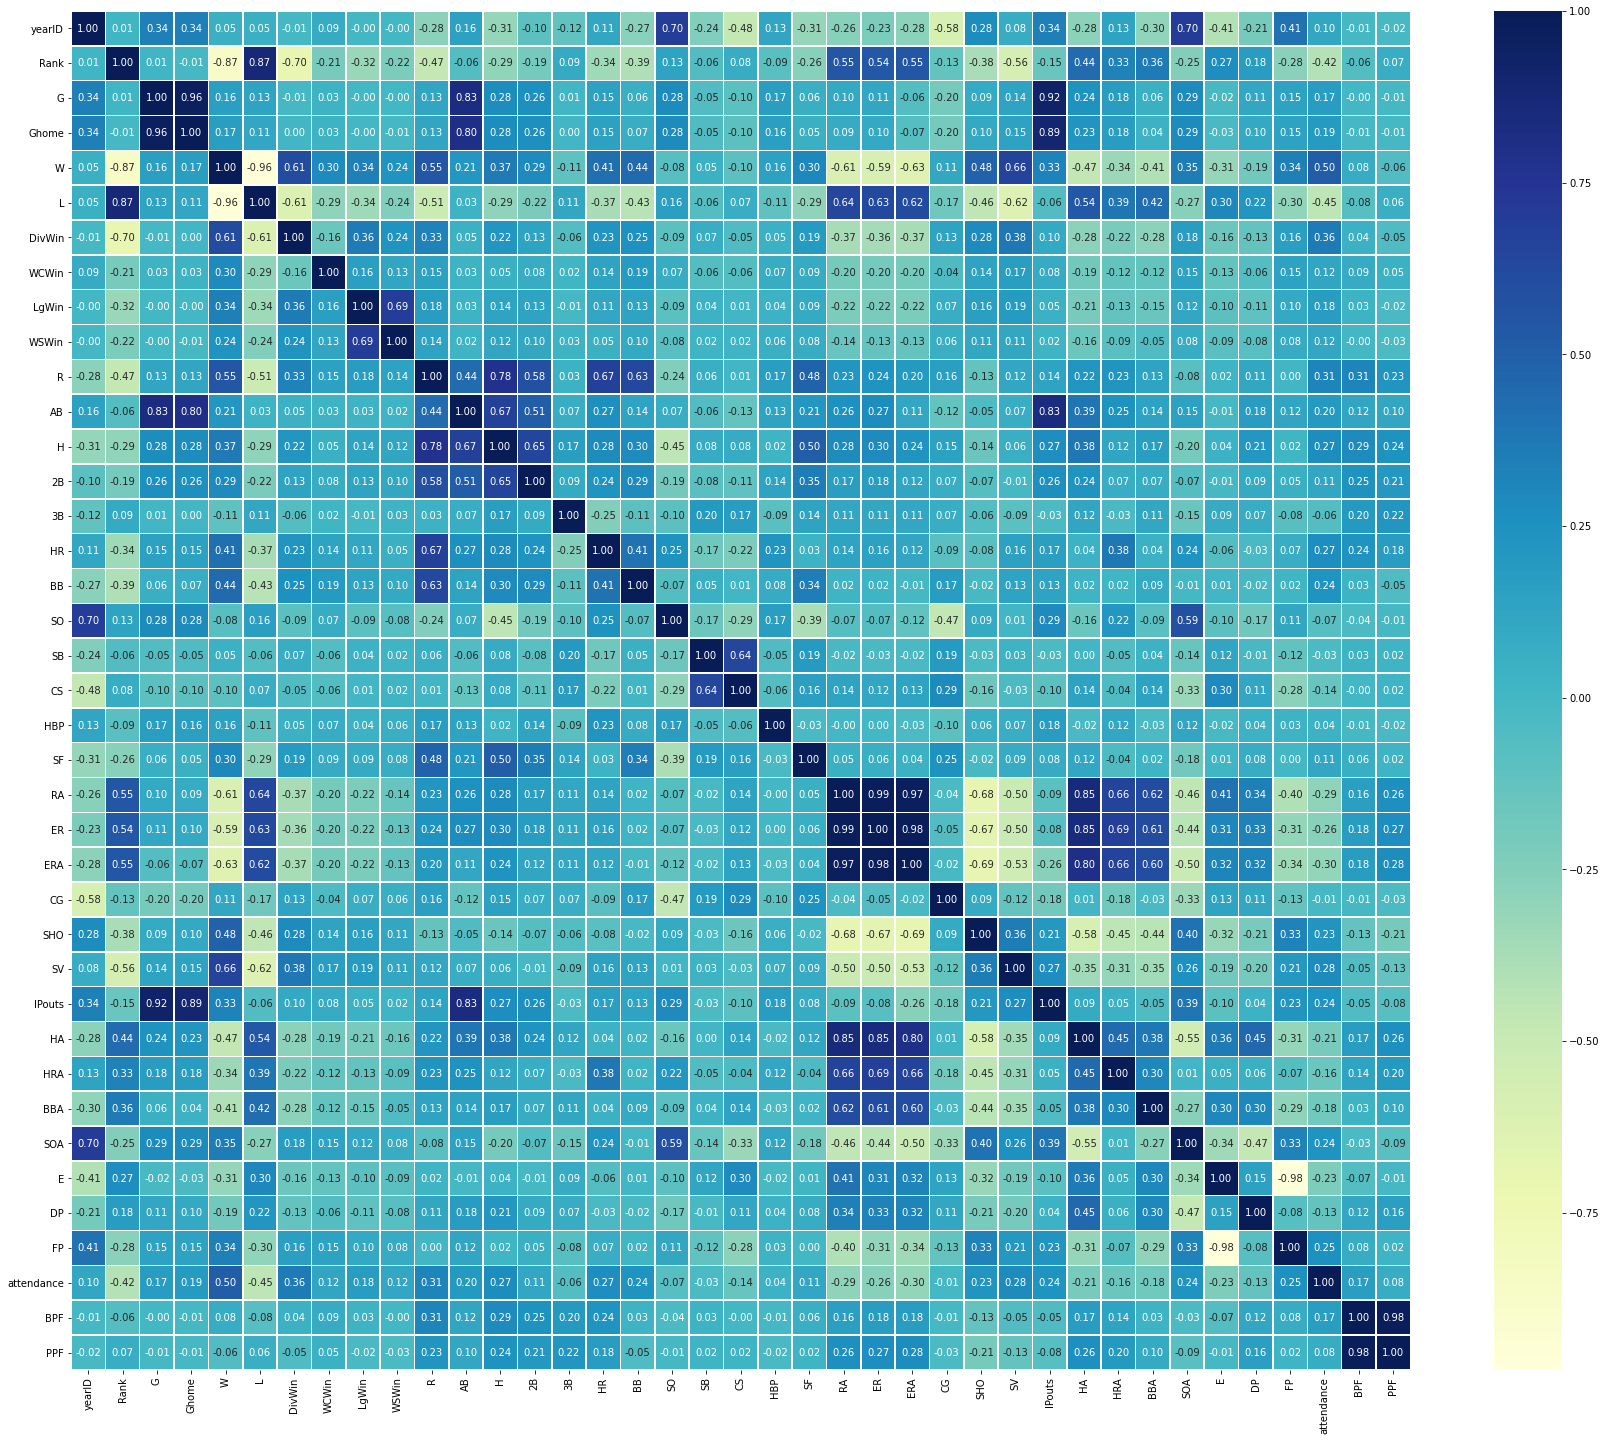

In [201]:
# Graph correlation matrix
corr_matrix = df_tmp.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt=".2f",
            cmap="YlGnBu");

Key takeaways:
* 69% Positive Correlation between WSWin and LgWin
* 61% Positive Correlation between DivWin and Win
* 36% Positive Correlation between DivWin and LgWin
* 34% Positive Correlation between LgWin and Win
* 24% Positive Correlation between WSWin and Win